In [25]:
# importing neccesary libraries 
import cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [26]:
# Let us reload some information , such as the characters
# get list of characters from Assets 
file = open("Assets/characters.txt","r")
characters = []
for data in file:
    substr = '\n'
    if substr in data:
        data_i = data.split('\n')
        data = data_i[0]
    characters.append(data)
print(characters)

['Narendra Modi', 'Leonardo DiCaprio', 'Tom Cruise', 'Dhoni', 'Virat']


In [27]:
# Now let us get our dataframe from the csv file 
df_complete = pd.read_csv("data/eigenFace.csv")
print(df_complete.head())

     0    1    2    3    4    5    6    7    8    9  ...  65527  65528  65529  \
0    4   23    4   46   20  116   35  100  168  183  ...      9     10      7   
1    0    0  141  253  247  239  235  237  234  233  ...      0      0      0   
2  123  124  126  128  130  131  133  135  139  142  ...     68     64     68   
3  237  237  237  244  254  252  235  198  186  188  ...    237    237    237   
4  255  255  255  255  255  255  255  255  255  254  ...     49     55     57   

   65530  65531  65532  65533  65534  65535      character  
0      7      5      6      7      5      6  Narendra Modi  
1      0      0      0      0      0      0  Narendra Modi  
2     74     78     80     79     79     78  Narendra Modi  
3    237    237    237    237    237    237  Narendra Modi  
4     55     53     52     47     45     49  Narendra Modi  

[5 rows x 65537 columns]


In [28]:
y = df_complete.iloc[:,-1]
df = df_complete.drop("character",axis = 'columns')

In [29]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [30]:
# calculate mean of each column
print(type(df))
mean = df.mean(axis=0)
print(type(mean))
print(mean)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
0         83.743243
1         81.500000
2         78.621622
3         83.513514
4         82.486486
            ...    
65531    114.094595
65532    114.067568
65533    113.202703
65534    111.797297
65535    112.648649
Length: 65536, dtype: float64


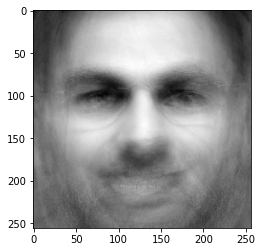

In [31]:
#show mean face by unflattening
plt.imshow(mean.values.reshape(256, 256), cmap='gray')
plt.show()

In [32]:
# standardize data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
class Dimensions():
    def __init__(self,input , components):
        self.train = input
        self.components = components
        from sklearn.decomposition import PCA
        self.pca = PCA(n_components=self.components)
        self.pca.fit(X_train)
    def transformNcomponents(self,data):
        transformed = self.pca.transform(data)
        return transformed
    def inverseTransformNComponents(self,data):
        invTransformed = self.pca.inverse_transform(data)
        return invTransformed

In [71]:
componentNo = 5
dimensionReducer = Dimensions(X_train,componentNo)

# To reduce into 5 number of components 
X_train_pca = dimensionReducer.transformNcomponents(X_train)
X_test_pca = dimensionReducer.transformNcomponents(X_test)

In [72]:
# Perform classification task 
# 1-NN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train.values.ravel())
print("Accuracy Score is : {:.2f}".format(knn.score(X_test_pca, y_test)))

# predict on test set
y_pred = knn.predict(X_test_pca)


Accuracy Score is : 0.73


C:\Users\aniru\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aniru\AppData\Roaming\Python\Python38\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

In [73]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                   precision    recall  f1-score   support

            Dhoni       0.40      1.00      0.57         2
Leonardo DiCaprio       1.00      1.00      1.00         2
    Narendra Modi       0.80      0.67      0.73         6
       Tom Cruise       1.00      1.00      1.00         2
            Virat       1.00      0.33      0.50         3

         accuracy                           0.73        15
        macro avg       0.84      0.80      0.76        15
     weighted avg       0.84      0.73      0.73        15



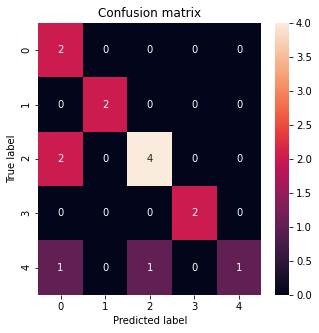

In [74]:
# plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [75]:
# Now before we proceed further , let us save our model 
import pickle
import os
if not os.path.exists('models'):
    os.mkdir('models') 
pickle.dump(knn,open('models/1nnModel.pkl','wb'))  

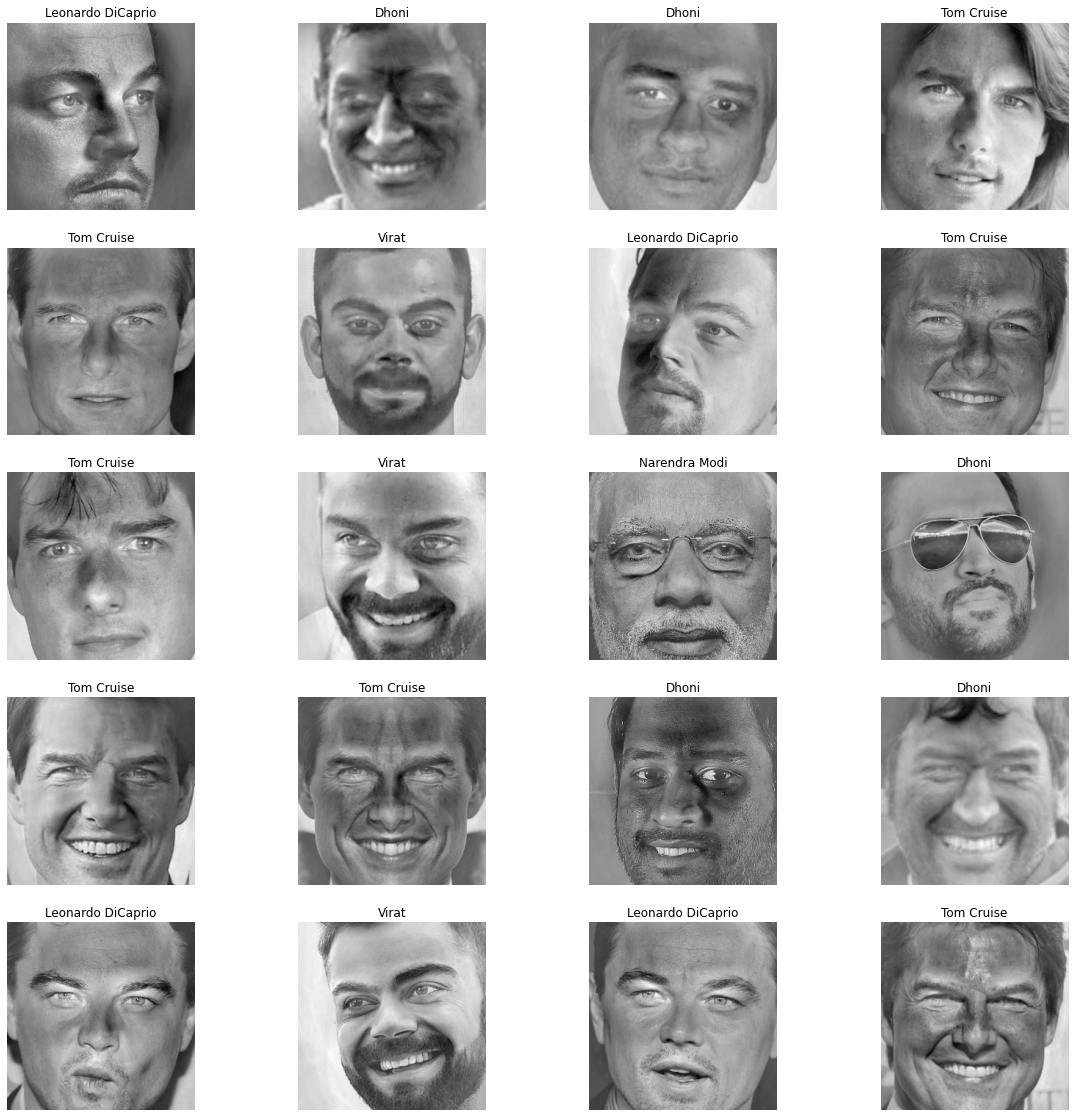

In [76]:
# Now to display some of the images from training set 

#import libraries
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(20, 20))
  
# setting values to rows and column variables
rows = 5
columns = 4

faces = 20
for i in range(faces):
    # Adds a subplot at the (i+1)th position
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(X_train[i].reshape(256, 256), cmap='gray')
    plt.axis('off')
    plt.title(y_train.iloc[i])
plt.show()


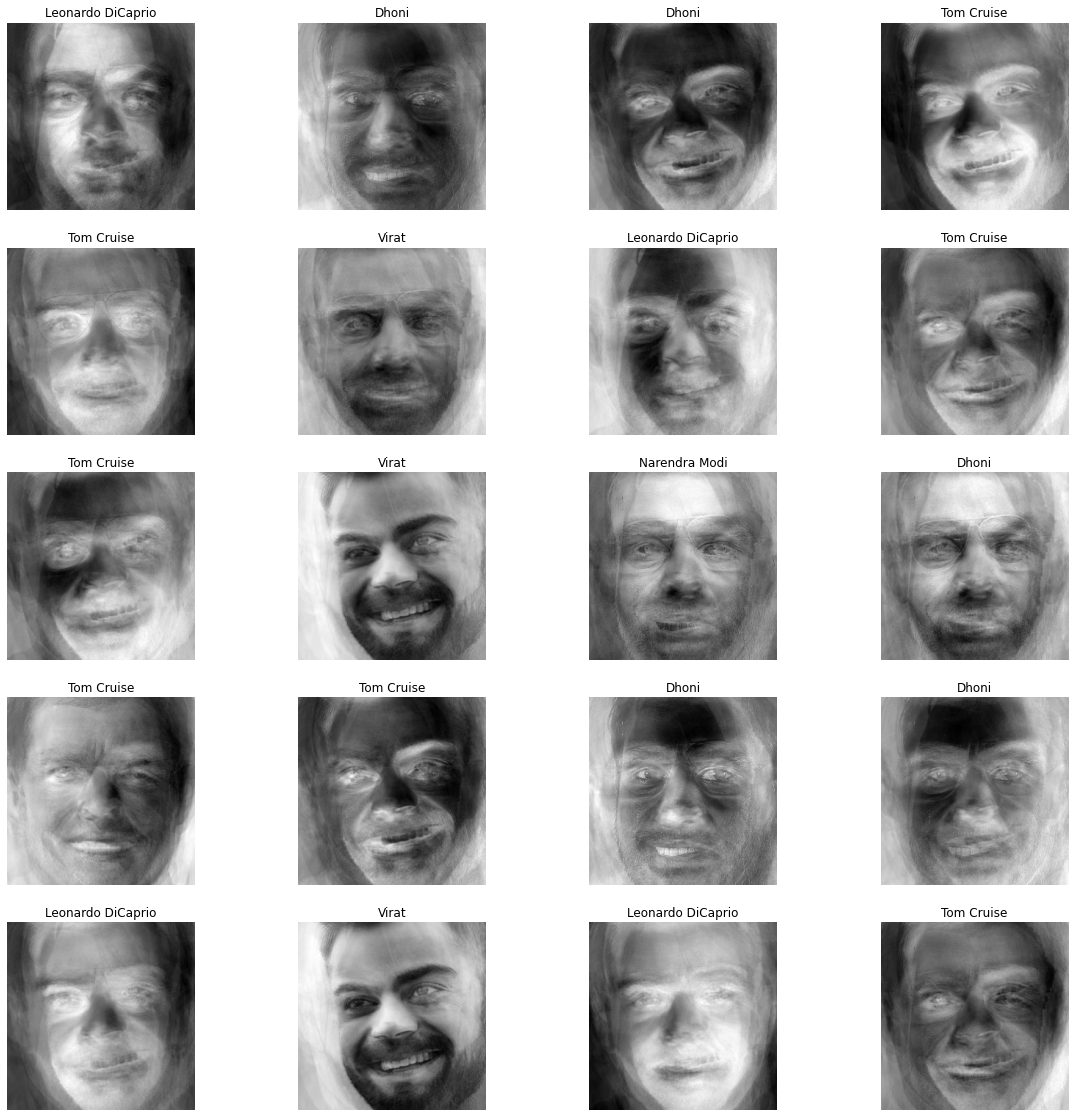

In [77]:
# Further lets check out the images when we try to retrive back to original images 
# From our reduced components 
# create figure
fig = plt.figure(figsize=(20, 20))
  
# setting values to rows and column variables
rows = 5
columns = 4

faces = 20
invTransformed_Xtrain = dimensionReducer.inverseTransformNComponents(X_train_pca)
for i in range(faces):
    # Adds a subplot at the (i+1)th position
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(invTransformed_Xtrain[i].reshape(256, 256), cmap='gray')
    plt.axis('off')
    plt.title(y_train.iloc[i])
plt.show()


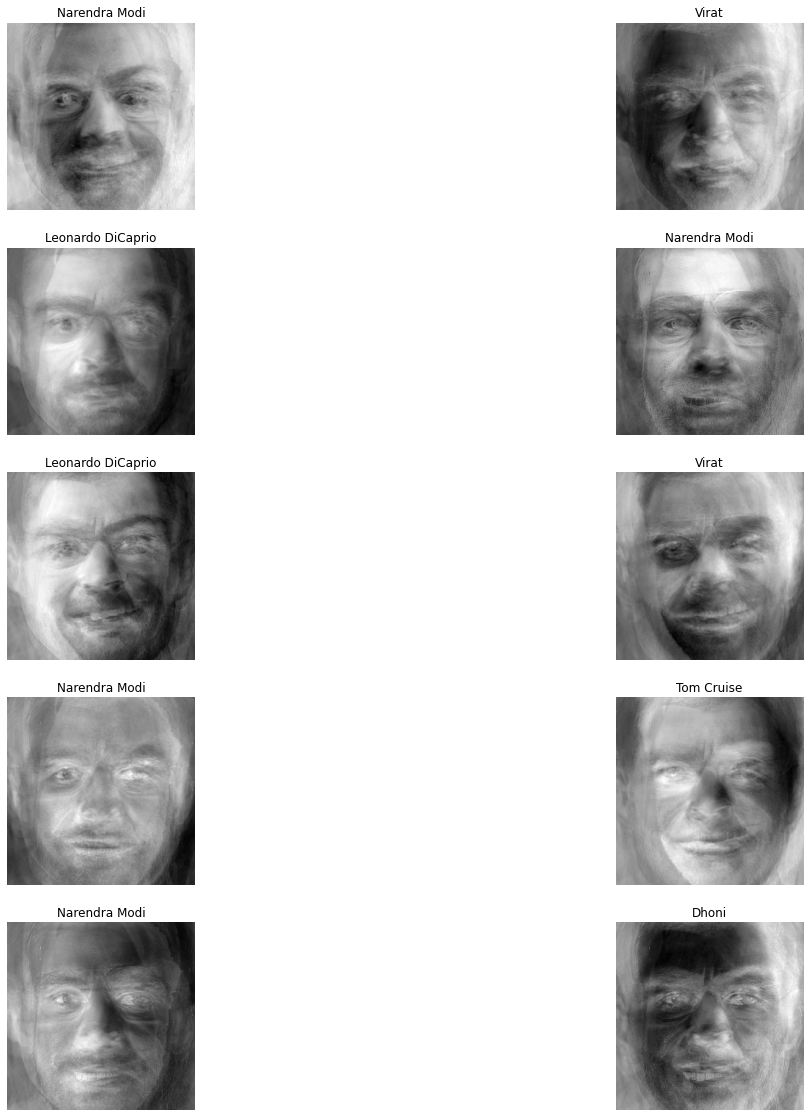

In [80]:
# Same on our test set looks like 
fig = plt.figure(figsize=(20, 20))
  
# setting values to rows and column variables
rows = 5
columns = 2

faces = 10
invTransformed_Xtrain = dimensionReducer.inverseTransformNComponents(X_test_pca)
for i in range(faces):
    # Adds a subplot at the (i+1)th position
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(invTransformed_Xtrain[i].reshape(256, 256), cmap='gray')
    plt.axis('off')
    plt.title(y_test.iloc[i])
plt.show()
